In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
df = pd.read_csv("Titanic.csv")
df.drop(columns=["Name","Ticket", "Cabin"], inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [76]:
df = pd.concat([df, pd.get_dummies(df['Sex'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Embarked'])], axis=1)
df.drop(columns=["Sex", "Embarked"], inplace=True)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,False,True,False,False,True
887,888,1,1,19.0,0,0,30.0000,True,False,False,False,True
888,889,0,3,NaN,1,2,23.4500,True,False,False,False,True
889,890,1,1,26.0,0,0,30.0000,False,True,True,False,False


In [77]:
bina = {False:0, True:1}
df["female"] = df["female"].apply(lambda x: bina[x])
df["male"] = df["male"].apply(lambda x: bina[x])
df["C"] = df["C"].apply(lambda x: bina[x])
df["Q"] = df["Q"].apply(lambda x: bina[x])
df["S"] = df["S"].apply(lambda x: bina[x])
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,0,3,NaN,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [78]:
df.isna().sum()
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [79]:
y = df.Survived
x = df
x.pop("Survived")

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [81]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [82]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [84]:
train_report = classification_report(y_train, train_pred)
test_report = classification_report(y_test, test_pred)

In [114]:
print("Train Report")
print(train_report)

print("Test Report")
print(test_report)

Train Report
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       432
           1       0.76      0.66      0.70       280

    accuracy                           0.78       712
   macro avg       0.78      0.76      0.77       712
weighted avg       0.78      0.78      0.78       712

Test Report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       117
           1       0.77      0.77      0.77        62

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



<Axes: >

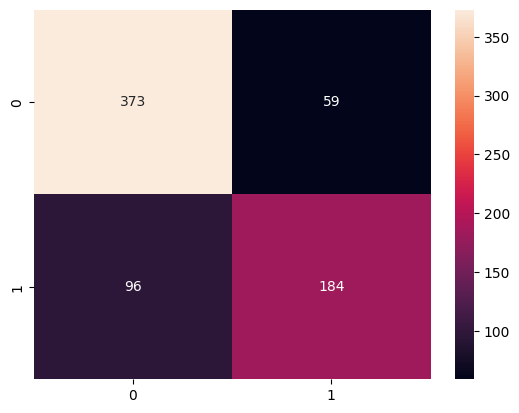

In [110]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_train,train_pred), annot=True,fmt='.0f')

<Axes: >

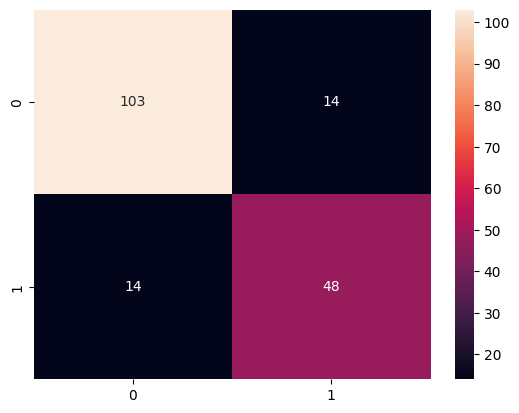

In [109]:
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True,fmt=".0f")